# Data preparation: from raw to analyzable data

In [1]:
import pandas as pd
import numpy as np


In [5]:
import os
os.chdir('/Users/owner/Documents/WC_DS/')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')

### revisit the making of some simple charts

* many choices for plotting libraries, we uses two below

* https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

* https://seaborn.pydata.org/examples/index.html



### making a histogram for the age column in the data

* using metplotlib.pyplot

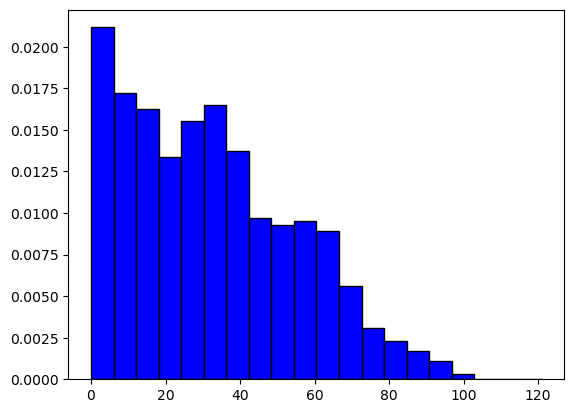

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins = 20, color = 'blue', edgecolor = 'black', density=True)
plt.show()

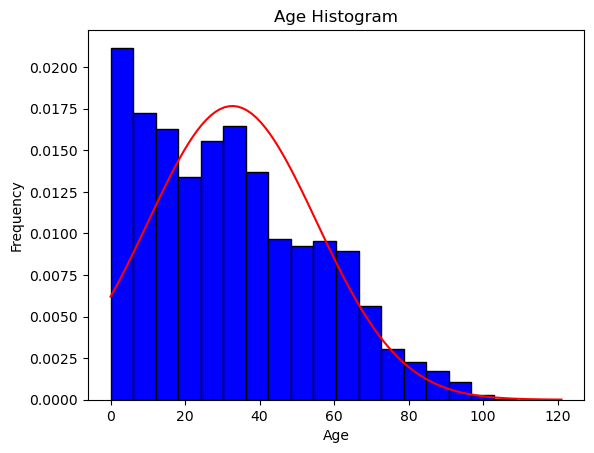

In [11]:
plt.hist(df['age'], bins = 20, color = 'blue', edgecolor = 'black', density=True)

# add normal distribution to see the difference 
mu = df['age'].mean()
sigma = df['age'].std()
x = np.linspace(df['age'].min(), df['age'].max(), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

plt.plot(x, y, color = 'red')

plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* plot two charts side by side

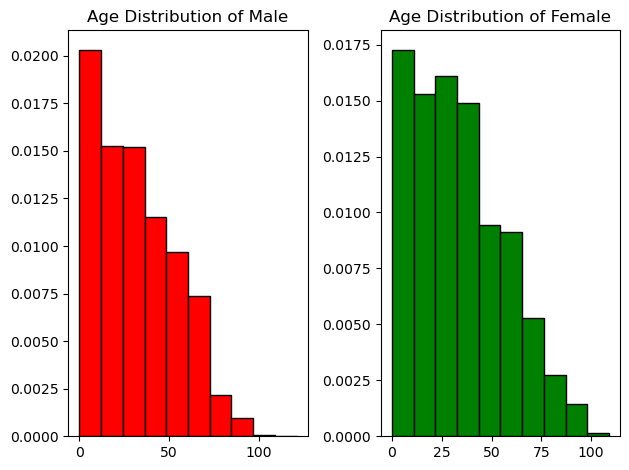

In [14]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)

ax0.hist(df[df["GENDER"]=="1~Male"]["age"], bins=10, density=True, histtype='bar', color="red", edgecolor = "black")
ax0.set_title('Age Distribution of Male')

ax1.hist(df[df["GENDER"]=="2~Female"]["age"], bins=10, density=True, histtype='bar', color = "green", edgecolor = "black")
ax1.set_title('Age Distribution of Female')

fig.tight_layout()
plt.show()

* use seaborn library

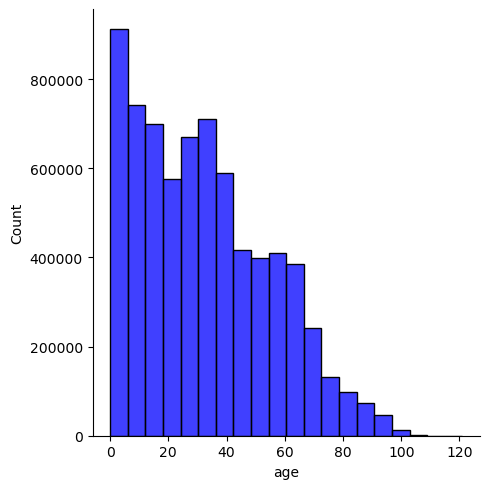

In [17]:
import seaborn as sns
sns.displot(df['age'], bins = 20, color = 'blue')


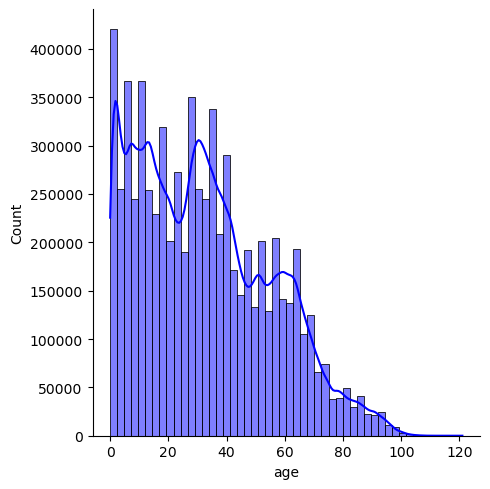

In [18]:
sns.displot(df['age'], bins = 50, color = 'blue', kde = True)


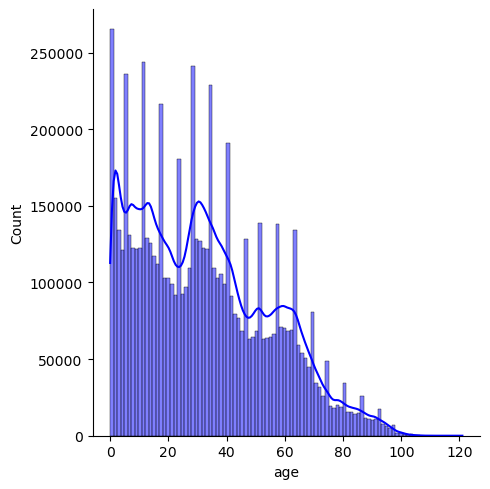

In [20]:
sns.displot(df['age'], bins = 100, color = 'blue', kde=True)  # this kde does not look right


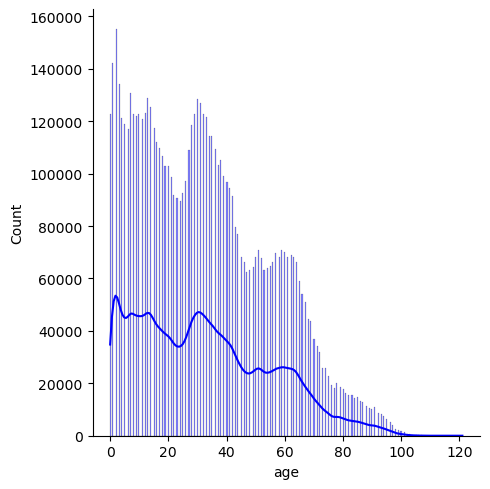

In [23]:
sns.displot(df['age'],color = 'blue', kde=True)  # this kde does not look right


### to investigate the issue, 
* need to trace back the parameters 
* seaborn layers on top of metplotlib
* sns.displot calls differet functions from within metplotlib, depending on the parameters, when bin number is bigger, or not given, displot calls different functions, the kde line stopps pairing with the height

<Axes: xlabel='age', ylabel='Density'>

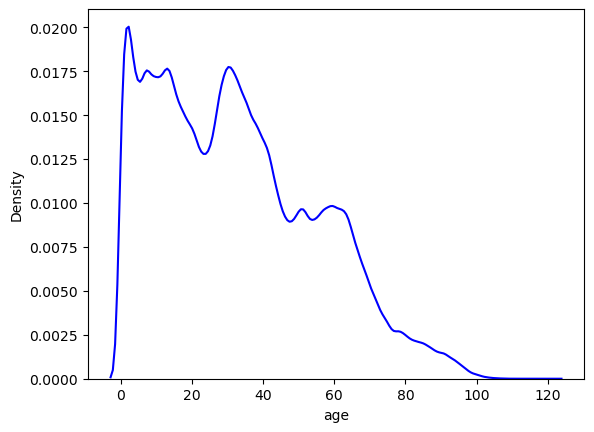

In [26]:

sns.kdeplot(df['age'], color = 'blue')

* make a boxplot of age, separated by gender

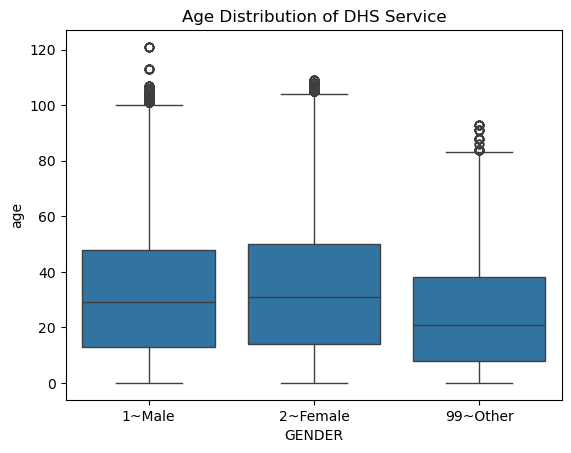

In [29]:
sns.boxplot(data = df, x = "GENDER", y = "age")
plt.title('Age Distribution of DHS Service')
plt.show()

* make a count plot

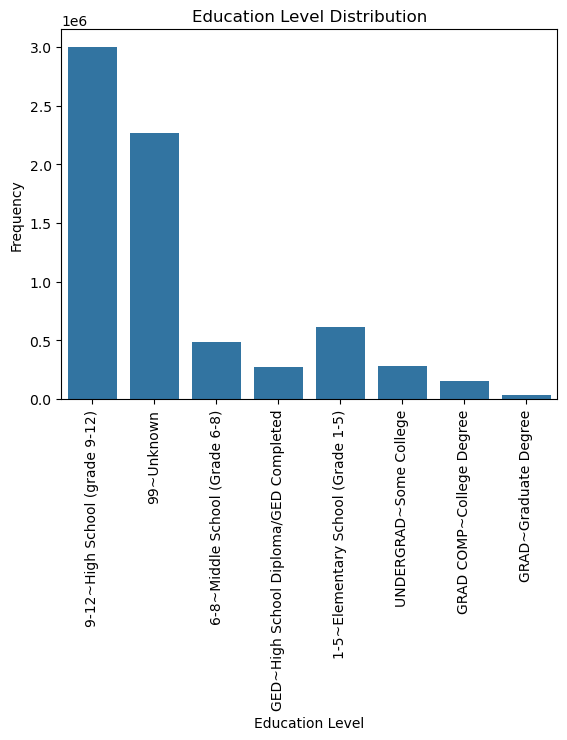

In [31]:
sns.countplot(x = df['EDUCATION_LEVEL'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

* to rotate the chart, just switch the x and y

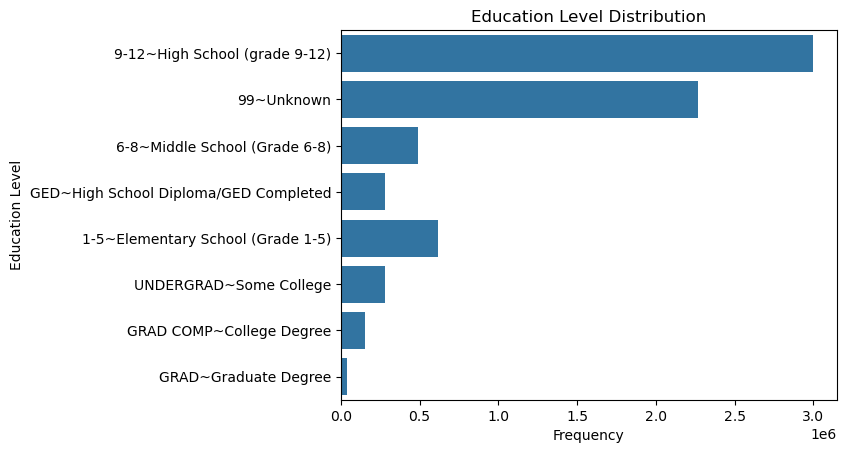

In [35]:
sns.countplot(y = df['EDUCATION_LEVEL']) 
plt.title('Education Level Distribution')
plt.ylabel('Education Level')
plt.xlabel('Frequency')
plt.show()

* make a barplot

KeyboardInterrupt: 

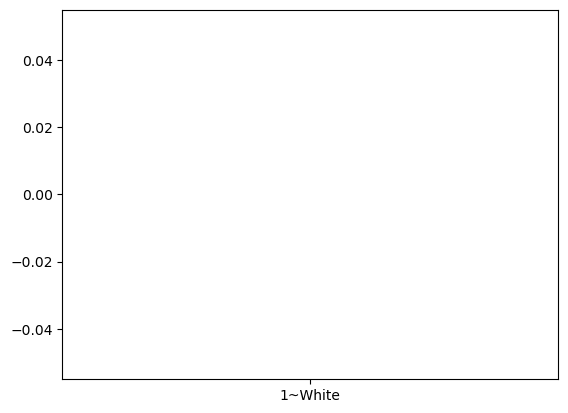

In [46]:
sns.barplot(data=df, x="RACE", y="age")
plt.xticks(rotation=90)
plt.show()

In [49]:
df.groupby("RACE")["age"].mean()

RACE
1~White                               34.718632
2~Black/African American              30.469064
4~Asian                               29.758956
5~Native American/Pacific Islander    36.226246
6~Two or More Races                   19.323124
7~Other Single Race                   18.286362
99~Unknown                            19.512704
Name: age, dtype: float64

### Removing NA Columns and Rows

* if we take a look of the data summary, we can spot the NA's

In [51]:
df.describe()

,MCI_UNIQ_ID,CALDR_YR,GEO_AREA,age,DOB,DOD,GENDER_IDENTITY,SEX_ORIENT,LEGAL_SEX,LIVING_ARRANGEMENT,EMPLOYMENT_STATUS,VETERAN_FLAG
count,7.116134e+06,7116134.0,0.0,7.116134e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.674853e+05,2021.0,NaN,3.267702e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.544397e+05,0.0,NaN,2.258095e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,2021.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.337730e+05,2021.0,NaN,1.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.675410e+05,2021.0,NaN,3.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.010820e+05,2021.0,NaN,4.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.356080e+05,2021.0,NaN,1.210000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* To drop NaN values, we can use a simple function called `df.dropna()`.

In [53]:
df.dropna(how='all', inplace=True)
df.shape

(7116134, 20)

Note to collaborators: dropping all NA rows like this has no effect as there are no rows of only NA values.

With this function, the default parameter for a hidden value `axis` removed rows of only NA values. To remove columns, we need to specify the axis.

In [56]:
#we want to remove any of the rows that have only NA values.
df.dropna(axis=1, how='all', inplace=True)
df.shape

(7116134, 11)

df.dropna(inplace=True)  will drop rows with any NA.

Note: I am still going to include code that would remove rows with only NA values, even though it is not relevant for this dataset. Github copilot says that df.dropna(axis=0, how='all', inplace=True) works, and I trust it for the moment.

Now what if we wanted to drop a row with a single NA value? We can simply remove the how='all' parameter and it will remove the rows with at least one NA value.

We can also drop the columns that has only one value in its entirety as they have not information. 

In [60]:
df.drop(['synthetic_data', 'CALDR_YR'], axis=1, inplace=True)
df.shape

(7116134, 9)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116134 entries, 0 to 7116133
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   MCI_UNIQ_ID      int64 
 1   DATE_OF_EVENT    object
 2   service          object
 3   age              int64 
 4   GENDER           object
 5   RACE             object
 6   ETHNICITY        object
 7   MARITAL_STATUS   object
 8   EDUCATION_LEVEL  object
dtypes: int64(2), object(7)
memory usage: 488.6+ MB


We can also lower case the columns for ease of work

In [65]:
df[df.MCI_UNIQ_ID==25958]

,MCI_UNIQ_ID,DATE_OF_EVENT,service,age,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
1227119,25958,01/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227120,25958,02/28/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227121,25958,03/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227122,25958,04/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227123,25958,05/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227124,25958,06/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227125,25958,07/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227126,25958,08/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227127,25958,09/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227128,25958,10/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)


In [67]:
df.rename(columns=str.lower, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116134 entries, 0 to 7116133
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   mci_uniq_id      int64 
 1   date_of_event    object
 2   service          object
 3   age              int64 
 4   gender           object
 5   race             object
 6   ethnicity        object
 7   marital_status   object
 8   education_level  object
dtypes: int64(2), object(7)
memory usage: 488.6+ MB


## change column names for ease of work


In [70]:
df.rename(columns = {'mci_uniq_id': 'id', 
                    'date_of_event': 'date', 
                    'marital_status': 'marital', 
                    'education_level':'education'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116134 entries, 0 to 7116133
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id         int64 
 1   date       object
 2   service    object
 3   age        int64 
 4   gender     object
 5   race       object
 6   ethnicity  object
 7   marital    object
 8   education  object
dtypes: int64(2), object(7)
memory usage: 488.6+ MB


In [72]:
df.shape

(7116134, 9)

In [74]:
df[df.id==25958]

,id,date,service,age,gender,race,ethnicity,marital,education
1227119,25958,01/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227120,25958,02/28/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227121,25958,03/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227122,25958,04/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227123,25958,05/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227124,25958,06/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227125,25958,07/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227126,25958,08/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227127,25958,09/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227128,25958,10/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)


# Basic Transformations

Often times when we encounter data, we find that it is in a format that is a bit clunky to use. Part of EDA will be to make datasets more friendly. Here we will go over four transformations: substitution, generation, outlier removal, and illogical value removal.

## Substitution

For the data entries that have strings in certain columns, like "Individuals_Receiving_DHS_Services", we may need to alter these. Strings can be a bit clunky to work with and are generally read better for plots when we have them in categories. Additionally, we can try and do some mathematical tests on them when we have numerical category labels.

In [77]:
df.service.nunique()

22

In [79]:
df.service.unique()

array(['Children_Attending_Early_Childhood_Programs_Managed_by_DHS',
       'Children_in_Care', 'Children_Receiving_Child_Welfare_Services',
       'Children_Receiving_DHS_Funded_Out_of_School_Programs',
       'Children_Receiving_Early_Intervention_Services',
       'Families_Receiving_Child_Welfare_Services', 'Homeless_Population',
       'Homicides', 'Individuals_Receiving_DHS_Services',
       'Individuals_Receiving_Family_Strengthening_Programs',
       'Individuals_Receiving_Homelessness_and_Housing_Services',
       'Individuals_Receiving_Income_Supports',
       'Individuals_Receiving_Intellectual_Disability_Services',
       'Individuals_Receiving_Mental_Health_Services',
       'Individuals_Receiving_Substance_Use_Disorder_Services',
       'Involuntary_Commitments', 'Jail_Population',
       'Mental_Health_Crises', 'Older_Adults_Receiving_Services',
       'Overdoses', 'Parents_Receiving_Child_Welfare_Services',
       'Suicides'], dtype=object)

## change some columns into catgorical type

we want to turn the columns for gender, race, ethnicity, marital status, and education level into the category data type.

In [82]:
df = df.astype({'id':'category', 
                'service':'category',
                'age': 'int',
                'gender':'category',
                'race':'category',
                'marital':'category',
                'education':'category'})


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116134 entries, 0 to 7116133
Data columns (total 9 columns):
 #   Column     Dtype   
---  ------     -----   
 0   id         category
 1   date       object  
 2   service    category
 3   age        int64   
 4   gender     category
 5   race       category
 6   ethnicity  object  
 7   marital    category
 8   education  category
dtypes: category(6), int64(1), object(2)
memory usage: 244.2+ MB


In [84]:
df[df.id==25958]

,id,date,service,age,gender,race,ethnicity,marital,education
1227119,25958,01/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227120,25958,02/28/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227121,25958,03/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227122,25958,04/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227123,25958,05/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227124,25958,06/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227125,25958,07/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227126,25958,08/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227127,25958,09/30/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)
1227128,25958,10/31/2021,Individuals_Receiving_Income_Supports,121,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,9-12~High School (grade 9-12)


## Generating new variabes
In other cases, we may want to generate a new variable. These can simply be combinations of previous variables, but in the case of this dataset, we will convert the "age" column to a categorical datatype variable as well. We will do this by putting ages in bins of 10 years.

In [89]:
#first we will define a helper function that takes in an int
#and returns the corresponding age bin value (grouped by 10), so a 5 gets returned as "0-9"
def age_bin(age):
    if age < 10:
        return "0-9"
    elif age < 20:
        return "10-19"
    elif age < 30:
        return "20-29"
    elif age < 40:
        return "30-39"
    elif age < 50:
        return "40-49"
    elif age < 60:
        return "50-59"
    elif age < 70:
        return "60-69"
    elif age < 80:
        return "70-79"
    elif age < 90:
        return "80-89"
    else:
        return "90+"
    
#is there a better way to do this? I am not sure, but we will go with this anyway. 
#it gets the job done.

#we will now apply this function to the age column and create a new column called AGE_BIN
df["age_bin"] = df["age"].apply(age_bin).astype('category')
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,age_bin
0,1626,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9
1,1626,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9
2,1626,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9
3,1626,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9
4,1626,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9


In [91]:
df.groupby("age_bin").count().sort_values(by="id",ascending=False)

/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/2439735706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_bin").count().sort_values(by="id",ascending=False)


,id,date,service,age,gender,race,ethnicity,marital,education
age_bin,,,,,,,,,
0-9,1287297,1287297,1287297,1287297,1287297,1287297,1287297,1287297,1287297
10-19,1169627,1169627,1169627,1169627,1169627,1169627,1169627,1169627,1169627
30-39,1145436,1145436,1145436,1145436,1145436,1145436,1145436,1145436,1145436
20-29,1014389,1014389,1014389,1014389,1014389,1014389,1014389,1014389,1014389
40-49,763619,763619,763619,763619,763619,763619,763619,763619,763619
50-59,674008,674008,674008,674008,674008,674008,674008,674008,674008
60-69,594030,594030,594030,594030,594030,594030,594030,594030,594030
70-79,253942,253942,253942,253942,253942,253942,253942,253942,253942
80-89,142763,142763,142763,142763,142763,142763,142763,142763,142763


## Working with date

We can generating additional variables for months in which the recipients use the service, for instance. 

We can do this by string operation, ie., to split the date of event so we get the month in which each service occurs. We can do this by simply getting the first two characters of the `date` column. 

In [94]:
#make a new month column
#this is the first two characters of the date column and the last 5 characters of the column
df["month_str"] = df["date"].str[:2] + df["date"].str[-5:]
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,age_bin,month_str
0,1626,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,01/2021
1,1626,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,02/2021
2,1626,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,03/2021
3,1626,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,04/2021
4,1626,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,05/2021


More appropriately, and easily, is to cast the "date" column into datetime type, which will give us many useful functions that works on datetime types.

In [97]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df["date"].dt.month_name()
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,age_bin,month_str,month
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,01/2021,January
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,02/2021,February
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,03/2021,March
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,04/2021,April
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),0-9,05/2021,May


## Outlier Removal
Often times, data will have outliers. These are data points that are very far from the majority of the data. In the case of a dataset with all categorical variables, this is not often feasible. However, such an act is more common with numeric features. Let's try the age category and remove all the rows with age 105 or greater.

In [100]:
#want to remove all entries from the dataset where the age entry is 105 or more
df[df["age"] >= 110].age.unique()


array([121, 113])

In [102]:
df[df["age"] >= 90].age.unique()


array([ 98,  90,  96,  95,  92,  91, 102,  97,  94,  93, 104, 101, 107,
        99, 100, 103, 105, 106, 108, 121, 109, 113])

In [104]:
df = df[df["age"] < 110] # this removes the records that have age greater than or equal to 110
df.shape

(7116098, 12)

## Illogical Value Removal
This portion of data transformations is slightly harder as we will have to look at multiple features at the same time. However, it is still important. Some data points in the dataset have children of age 5, yet lists them as in high school.

we may want to remove all the values where the age is 0-9 AND where they are listed as in high school as "9-12~High School (grade 9-12)".

however, the number of receipients in this group seems to be rather high. As a synthetic dataset, this might be due to synthesis process/algorithm. The technical report on the synthetic dataset had mentioned that the synthetic data on rare combinations of more than one variables has bigger distnace from real data (in this case, it should be zero). 

If this is real data, this may indicate it is rather a data collection issue and not to dismissed. 


In [108]:
df[((df["age_bin"] == "0-9") & (df["education"] == "9-12~High School (grade 9-12)"))].id.unique()


[1626, 5570, 6022, 7912, 9265, ..., 535587, 535608, 167753, 266643, 470350]
Length: 43298
Categories (533799, int64): [1, 2, 3, 4, ..., 535605, 535606, 535607, 535608]

# Advanced Transformations

Sometimes when doing exploratory data analysis, the storage format of the table does not give a complete view of the picture. In the case of this dataset, we found earlier that there were several rows with the same ID, which means that there are multiple entries for some people. This indicates that they used the services provided in the dataset multiple times. 

To get a better picture of some data insights, we can make a new dataframe; this one will have one row for each ID, and we will add the columns regarding the number of services used, number of distinct services used, and the number of months the services were used. Because the dataset is big, this may take a while.

In general cases, to find new transformations for the datasets you work with, you will need to think about the general direction to take the data, which can involve simply thinking about the data logically. However, a better approach is to consult domain knowledge. This basically involves looking to sources related to the data (research articles, people who collected the data, people who are knowledgeable on the subject) and transforming the data as they may advise, or getting advice on where to look for ideas on transformations.

Here, we are going to perform two aggregative transformations. These will group the entries of the dataset by the ID, as well as by the (ID, Month) pairing and compute some summary statistics, including the number of services used, the number of months the services were used, and the range of dates the services were used.

In [111]:
df[df.id==25958]

,id,date,service,age,gender,race,ethnicity,marital,education,age_bin,month_str,month


In [113]:
def get_recipient_attribute(df):
    recipient = df.groupby(['id']).agg(
        num_service = ('service', 'count'),
        distinct_service = ('service', 'nunique'), 
        first_date = ('date', 'min'), 
        last_date = ('date', 'max'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    ).reset_index()

    return recipient


* agg made "id" into index in the aggregation result 
* reset_index() put the old index ("id" in this case") into a column, and use sequential index 

In [116]:

recipient = get_recipient_attribute(df)
recipient.head()

/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/2557517183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(['id']).agg(


,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month
0,1,12,1,2021-01-31,2021-12-31,12,12
1,2,1,1,2021-02-28,2021-02-28,1,1
2,3,11,1,2021-02-28,2021-12-31,11,11
3,4,4,1,2021-03-31,2021-12-31,4,4
4,5,12,1,2021-01-31,2021-12-31,12,12


Similarly, we perform the recipient-month attribute aggregations. For recipient and month combination, number of services and number of distinct services are the same.
The service usage for each recipient and each month is only a flag, indicating the use but not recording how many times within the month. 

In [119]:
def get_recipient_month_attribute(df):
    recipient_month = df.groupby(['id', 'month']).agg(
        num_service = ('service', 'count'),
    ).reset_index()

    return recipient_month


In [121]:
recipient_month = get_recipient_month_attribute(df)
recipient_month.head()

/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/500739487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient_month = df.groupby(['id', 'month']).agg(


,id,month,num_service
0,1,April,1
1,1,August,1
2,1,December,1
3,1,February,1
4,1,January,1


Now, we can merge the datasets in a sense so that some of the information about each person can carry over to the new datasets we've created. Specifically, we want to carry over gender, race, ethnicity, education level, and marital status. 

In [124]:
#start with recipient
#we want to add columns of age, gender, race, ethnicity, education level, and marital status
#from the original dataset, making sure IDs match up and that there is only one occurrence of each ID.
recipient = pd.merge(recipient, df[['id', 'age', 'gender', 'race', 'ethnicity', 'marital', 'education','age_bin']], on='id', how='left')
#now remove duplicate rows
recipient = recipient.drop_duplicates(subset=['id'])
recipient.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,age_bin
0,1,12,1,2021-01-31,2021-12-31,12,12,13.0,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,10-19
12,2,1,1,2021-02-28,2021-02-28,1,1,70.0,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,99~Unknown,70-79
13,3,11,1,2021-02-28,2021-12-31,11,11,29.0,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),20-29
24,4,4,1,2021-03-31,2021-12-31,4,4,4.0,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),0-9
28,5,12,1,2021-01-31,2021-12-31,12,12,40.0,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,40-49


In [125]:
#we'll do the same with recipient_month
recipient_month = pd.merge(recipient_month, df[['id', 'age', 'gender', 'race', 'ethnicity', 'marital', 'education','age_bin']], on='id', how='left')
#now remove rows that have duplicate ID-month pairs
recipient_month = recipient_month.drop_duplicates(subset=['id', 'month'])
recipient_month.head()

,id,month,num_service,age,gender,race,ethnicity,marital,education,age_bin
0,1,April,1,13.0,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,10-19
12,1,August,1,13.0,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,10-19
24,1,December,1,13.0,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,10-19
36,1,February,1,13.0,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,10-19
48,1,January,1,13.0,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,10-19


# Saving Data Transformations
If you want to close your work and come back to it easily without having to rerun all of the above code, or if you want to use the same data in a new notebook, an easy workaround is to save the data to an intermediate file and then reload it. We'll be saving all of our datasets to files that we will then plot in the next section.

* the above cell is made into "raw" so it does not get to be run when we do "run all"

## Looking at number of services


In [130]:
recipient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533799 entries, 0 to 7116089
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                533799 non-null  category      
 1   num_service       533799 non-null  int64         
 2   distinct_service  533799 non-null  int64         
 3   first_date        533796 non-null  datetime64[ns]
 4   last_date         533796 non-null  datetime64[ns]
 5   num_month         533799 non-null  int64         
 6   distinct_month    533799 non-null  int64         
 7   age               533796 non-null  float64       
 8   gender            533796 non-null  category      
 9   race              533796 non-null  category      
 10  ethnicity         533796 non-null  object        
 11  marital           533796 non-null  category      
 12  education         533796 non-null  category      
 13  age_bin           533796 non-null  category      
dtypes: categ

In [131]:
recipient.describe()

,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age
count,533799.000000,533799.000000,533796,533796,533799.000000,533799.000000,533796.000000
mean,13.331044,1.412423,2021-02-17 13:23:53.671289856,2021-12-24 00:59:53.282826752,13.331044,10.688772,32.402779
min,0.000000,0.000000,2021-01-31 00:00:00,2021-01-31 00:00:00,0.000000,0.000000,0.000000
25%,12.000000,1.000000,2021-01-31 00:00:00,2021-12-31 00:00:00,12.000000,12.000000,13.000000
50%,12.000000,1.000000,2021-01-31 00:00:00,2021-12-31 00:00:00,12.000000,12.000000,29.000000
75%,12.000000,1.000000,2021-01-31 00:00:00,2021-12-31 00:00:00,12.000000,12.000000,49.000000
max,89.000000,10.000000,2021-12-31 00:00:00,2021-12-31 00:00:00,89.000000,12.000000,109.000000
std,8.146127,0.933249,NaN,NaN,8.146127,2.946890,23.189489


this says for most of recipients, the number of services is 12, and number of disctinct services is 1. 

but why do we have min as zero service? supposed the data file contains the usage of services, why would someone not using service and still in the data file? Recall we have removed recipients who are older than 110? 

In [133]:
recipient[recipient.num_service == 0].id.to_list()

[25958, 85700, 473987]

In [134]:
recipient[recipient.num_service == 0]

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,age_bin
346207,25958,0,0,NaT,NaT,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139955,85700,0,0,NaT,NaT,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306687,473987,0,0,NaT,NaT,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# to verify, re-read the data file as orignal and check
check_list = recipient[recipient.num_service == 0].id.to_list()
df1 = pd.read_csv('dhs_service_records_synthesized_final.csv')
df1[df1.MCI_UNIQ_ID.isin(check_list)]

,synthetic_data,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,GENDER_IDENTITY,SEX_ORIENT,LEGAL_SEX,RACE,ETHNICITY,LIVING_ARRANGEMENT,EMPLOYMENT_STATUS,MARITAL_STATUS,EDUCATION_LEVEL,VETERAN_FLAG
1227119,SYNTHETIC DATA,25958,2021,01/31/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227120,SYNTHETIC DATA,25958,2021,02/28/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227121,SYNTHETIC DATA,25958,2021,03/31/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227122,SYNTHETIC DATA,25958,2021,04/30/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227123,SYNTHETIC DATA,25958,2021,05/31/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227124,SYNTHETIC DATA,25958,2021,06/30/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227125,SYNTHETIC DATA,25958,2021,07/31/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227126,SYNTHETIC DATA,25958,2021,08/31/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227127,SYNTHETIC DATA,25958,2021,09/30/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN
1227128,SYNTHETIC DATA,25958,2021,10/31/2021,Individuals_Receiving_Income_Supports,NaN,121,NaN,NaN,1~Male,NaN,NaN,NaN,2~Black/African American,99~Unknown,NaN,NaN,1~Single-Never Married,9-12~High School (grade 9-12),NaN


these are the three recipients that we removed during outlier removal, who have age greater than 110.

Hence, we may consider making catgegory type change after removing outliers, the ID of the removed records will not make into the category label list.

* alternatively, we can remove the unused categories when doing groupby

In [137]:
recipient.shape

(533799, 14)

In [138]:
recipient[recipient.distinct_service==0].shape

(3, 14)

In [147]:
recipient[recipient.distinct_service==1].shape

(424465, 14)

In [149]:
def get_recipient_attribute(df):
    recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(  ### remove unused categories 
        num_service = ('service', 'count'),
        distinct_service = ('service', 'nunique'), 
        first_date = ('date', 'min'), 
        last_date = ('date', 'max'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    ).reset_index()

    return recipient

In [151]:
recipient_new = get_recipient_attribute(df)


/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/312276210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(  ### remove unused categories


In [153]:
recipient_new.shape

(533796, 7)

* we see the ID size (number of rows) is reduced by 3, the outliers that were removed in earlier step.

* based on my experience, not making the ID column as category type is the best in accordance with the need of having categorical variables. IDs are unique for an entity, in our case it is for the recipient. there is no real meaning that each ID is a category label. Therefore making ID as integer is appropriate.

### Now, going back to inspect the number of services

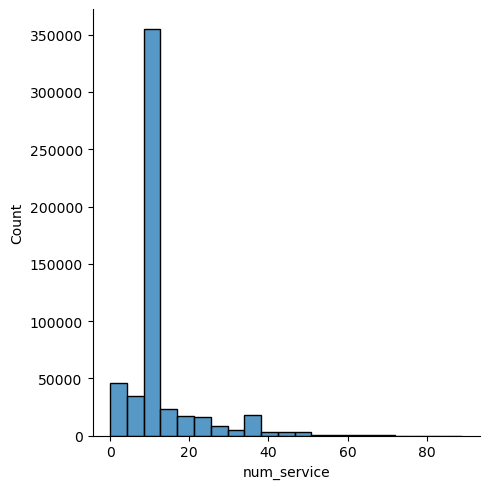

In [157]:
import seaborn as sns
sns.displot(recipient, x="num_service")

this says many people may have similar number of services, maybe even same number of services, need to drill down.

we can take a look at the distict services recipients use

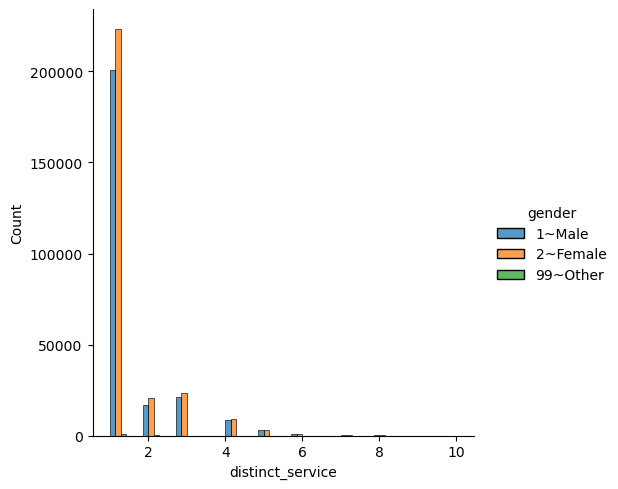

In [160]:
sns.displot(recipient, x="distinct_service", hue = "gender", multiple="dodge")


Now we can see right away that overwhelming majority of recipients uses only one service in the entire year.

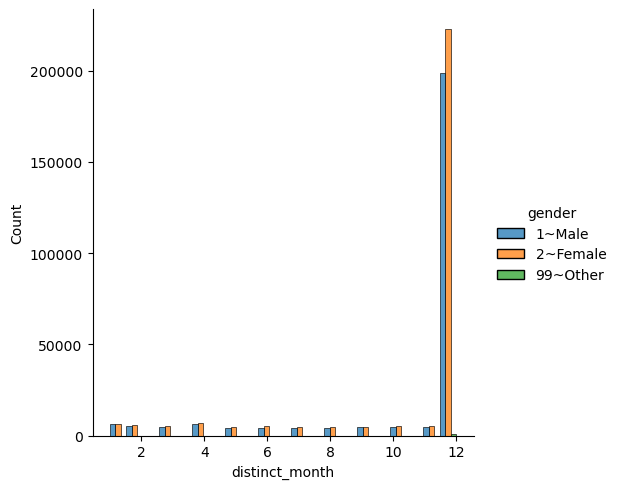

In [163]:
sns.displot(recipient, x="distinct_month", hue = "gender", multiple="dodge")


In-class work: 

- identify the top services by number of recipients
     - you can choose to do by other measures (e.g., total usage months)
- define a python function that computes characteristic attributes for services
     - input: the service recipient event dataset
     -  output: a data frame, with rows for services and columns for various attributes of the services
     -  design your own attributes, see examples of attributes for recipients
- create a new dataframe that hold attributes for services
     - row keyed by service
     - columns contain attributes that output by the function you created
- experiment aggregation with or without reset_index() and see what happens


In [194]:
top_services_total = df.groupby('service')['id'].count()
top_services_sorted = top_services_total.sort_values(ascending=False)
print(top_services_sorted)

service
Individuals_Receiving_Income_Supports                         5450981
Individuals_Receiving_DHS_Services                             626722
Individuals_Receiving_Mental_Health_Services                   324241
Individuals_Receiving_Homelessness_and_Housing_Services        148968
Older_Adults_Receiving_Services                                131129
Individuals_Receiving_Substance_Use_Disorder_Services           74737
Individuals_Receiving_Intellectual_Disability_Services          74145
Parents_Receiving_Child_Welfare_Services                        54035
Children_Receiving_Child_Welfare_Services                       50373
Children_Receiving_Early_Intervention_Services                  45923
Individuals_Receiving_Family_Strengthening_Programs             28110
Jail_Population                                                 26987
Families_Receiving_Child_Welfare_Services                       23473
Children_in_Care                                                18442
Homeless_Pop

/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/1208978237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_services_total = df.groupby('service')['id'].count()


In [248]:
def get_service_attribute(df):
    service = df.groupby(df['service'].cat.remove_unused_categories()).agg( 
        num_service = ('service', 'count'),
        distinct_id = ('id', 'nunique'), 
        first_date = ('date', 'min'), 
        last_date = ('date', 'max'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    ).reset_index()

    return service

In [250]:
get_service_attribute(df)

/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/2253254748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service = df.groupby(df['service'].cat.remove_unused_categories()).agg(


,service,num_service,distinct_id,first_date,last_date,num_month,distinct_month
0,Children_Attending_Early_Childhood_Programs_Ma...,2302,349,2021-01-31,2021-12-31,2302,12
1,Children_Receiving_Child_Welfare_Services,50373,7306,2021-01-31,2021-12-31,50373,12
2,Children_Receiving_DHS_Funded_Out_of_School_Pr...,4606,1198,2021-01-31,2021-12-31,4606,12
3,Children_Receiving_Early_Intervention_Services,45923,6752,2021-01-31,2021-12-31,45923,12
4,Children_in_Care,18442,2237,2021-01-31,2021-12-31,18442,12
5,Families_Receiving_Child_Welfare_Services,23473,3118,2021-01-31,2021-12-31,23473,12
6,Homeless_Population,13950,3415,2021-01-31,2021-12-31,13950,12
7,Homicides,172,172,2021-01-31,2021-12-31,172,12
8,Individuals_Receiving_DHS_Services,626722,82122,2021-01-31,2021-12-31,626722,12
9,Individuals_Receiving_Family_Strengthening_Pro...,28110,2986,2021-01-31,2021-12-31,28110,12


In [252]:
def get_service_attribute2(df):
    service = df.groupby(df['service'].cat.remove_unused_categories()).agg( 
        num_service = ('service', 'count'),
        distinct_id = ('id', 'nunique'), 
        first_date = ('date', 'min'), 
        last_date = ('date', 'max'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    )

    return service

In [254]:
get_service_attribute2(df)

/var/folders/4d/9v04gb7d0z75_dg3gtdvtnz40000gn/T/ipykernel_22930/1412804215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service = df.groupby(df['service'].cat.remove_unused_categories()).agg(


,num_service,distinct_id,first_date,last_date,num_month,distinct_month
service,,,,,,
Children_Attending_Early_Childhood_Programs_Managed_by_DHS,2302,349,2021-01-31,2021-12-31,2302,12
Children_Receiving_Child_Welfare_Services,50373,7306,2021-01-31,2021-12-31,50373,12
Children_Receiving_DHS_Funded_Out_of_School_Programs,4606,1198,2021-01-31,2021-12-31,4606,12
Children_Receiving_Early_Intervention_Services,45923,6752,2021-01-31,2021-12-31,45923,12
Children_in_Care,18442,2237,2021-01-31,2021-12-31,18442,12
Families_Receiving_Child_Welfare_Services,23473,3118,2021-01-31,2021-12-31,23473,12
Homeless_Population,13950,3415,2021-01-31,2021-12-31,13950,12
Homicides,172,172,2021-01-31,2021-12-31,172,12
Individuals_Receiving_DHS_Services,626722,82122,2021-01-31,2021-12-31,626722,12
